In [3]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
import numpy as np
from tqdm import tqdm
import h5py
import tifffile as tiff
from typing import Literal
import random

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualize Dataset

## CNNT Dataset

In [2]:
dataset_dir = Path("dataset/Denoising/")
datasets = sorted(dataset_dir.glob("*"))
cprint(
    "The available datasets are:",
    *[f"rand:{_.stem}" for _ in datasets],sep="\n"
)

The available datasets are:
Actin
Actin_Training
Demo
ER
ER_Training
Golji
Golji_Training
Lysosome
Lysosome_Training
Matrix_Mitochondria
Matrix_Mitochondria_Training
Microtubule
Microtubule_Training
Tomm20_Mitochondria
Tomm20_Mitochondria_Training
tree


In [32]:
dataset = "Golji"

In [ ]:
x_dir, gt_dir = (dataset_dir / dataset / "Training" / _ for _ in ["Raw", "GT"])

footages=list(x_dir.glob("*.tif"))
idx=random.choice(range(len(footages)))
footage = footages[idx]
cprint(f"yellow:Reading {footage.stem}")

x = Recording(footage, max_frames=2)
gt = Recording(gt_dir / f"{footage.stem}_decon.tif", max_frames=2)

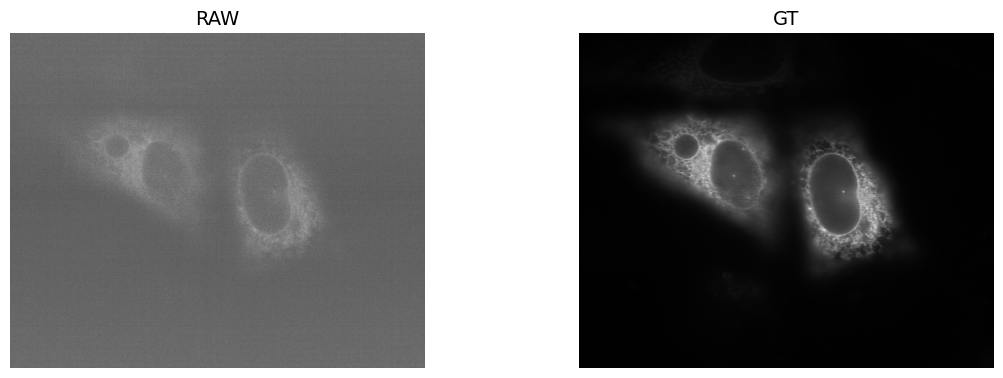

In [16]:
imshow({"RAW": x.np[0], "GT": gt.np[0]}, size=5)

In [ ]:
gt.render(f"{dataset}{idx}_gt.mp4", bitrate=3000)

## OABF Dataset

In [5]:
dataset_dir = Path("dataset/")
datasets = sorted(dataset_dir.glob("*.h5"))
cprint(
    "The available datasets are:\n",
    *[f"rand:{_.stem}" for _ in datasets],
)

The available datasets are:
 oabf_astro


In [ ]:
dataset = "oabf_astro"

In [34]:
h5file = h5py.File(dataset_dir / f"{dataset}.h5", libver="latest", mode="r")
cprint(
    "The available footages are:\n",
    *[f"rand:{_}" for _ in h5file.keys()],
)

The available footages are:
 0 1350 2025 2700 3375 4050 4725 5400 6075 675 6750 7425 8100 8775 9450


In [35]:
footage = "2700"

In [ ]:
x, gt = (np.array(h5file[footage][_]) for _ in ["noisy_im", "clean_im"])

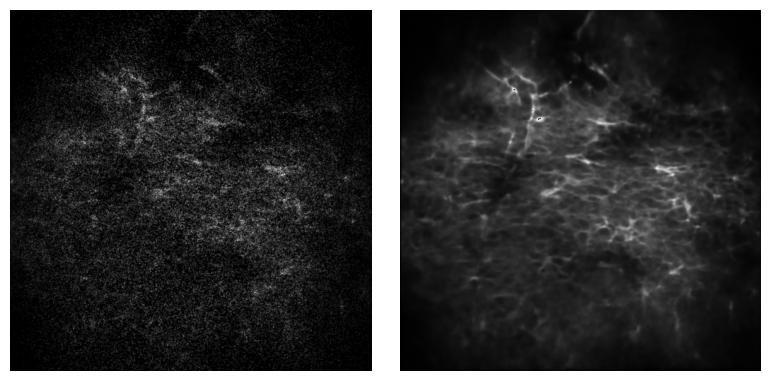

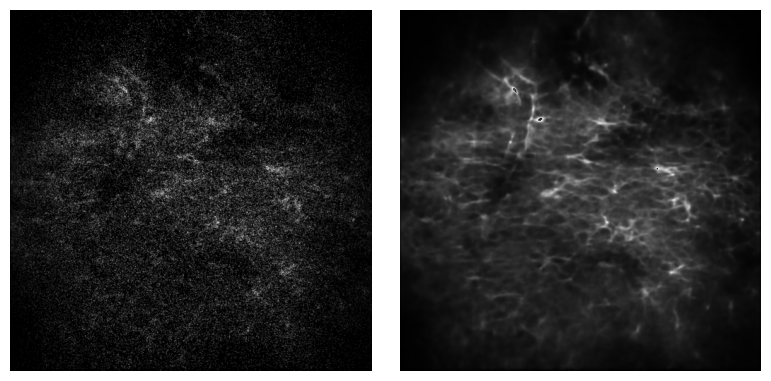

In [ ]:
for i in range(0, x.shape[0], 8):
    imshow([x[i], gt[i]])